# Predicting Customer Ad Clicks

Business Case

Analyzing customer behaviour by predicting which customer clicks on the advertisement

Features: Daily Time Spent on Site, Age, Area Income, Daily Internet Usage, Ad Topic Line, City, Male, Country, Timestamp

Target: Clicked on Ad( 1: Customer clicked an ad, 0: Customer did not click the ad)

Datasource: https://www.kaggle.com/code/mafrojaakter/customer-ad-click-prediction/notebook

## Importing Libraries and Dataset

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid = False)

from sklearn.preprocessing import StandardScaler

In [75]:
#Reading csv file
clicks_df = pd.read_csv('Ad Click Data.csv')

In [7]:
clicks_df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0.0,Tunisia,3/27/2016 0:53,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1.0,Nauru,4/4/2016 1:39,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0.0,San Marino,3/13/2016 20:35,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1.0,Italy,1/10/2016 2:31,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0.0,Iceland,6/3/2016 3:36,0
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1.0,Lebanon,2/11/2016 21:49,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1.0,Bosnia and Herzegovina,4/22/2016 2:07,1
997,NaN,51,42415.72,120.37,Expanded intangible solution,South Jessica,1.0,Mongolia,2/1/2016 17:24,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0.0,Guatemala,3/24/2016 2:35,0


## Exploring Dataset

In [11]:
clicks_df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,987.000000,1000.000000,987.000000,989.000000,997.000000,1000.00000
mean,64.929524,36.009000,54980.667234,179.863620,0.480441,0.50000
std,15.844699,8.785562,13439.998510,43.870142,0.499868,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.270000,29.000000,46947.570000,138.710000,0.000000,0.00000
50%,68.110000,35.000000,57009.760000,182.650000,0.000000,0.50000
75%,78.460000,42.000000,65479.350000,218.790000,1.000000,1.00000
max,91.430000,61.000000,79484.800000,267.010000,1.000000,1.00000


In [43]:
#Counting the number and percentage of people that clicked and did not clicked
clicked = len(clicks_df[clicks_df['Clicked on Ad'] == 1])
no_clicked = len(clicks_df[clicks_df['Clicked on Ad'] == 0])
total = len(clicks_df)

print(f'Total examples: {total}')
print('People that clicked on Ad:', clicked)
print('Percentage of people that clicked on Ad:', (clicked/total) * 100)
print('People that did not clicked on Ad:', no_clicked)
print('Percentage of people that did not clikced on Ad:', (no_clicked/total) * 100)

Total examples: 1000
People that clicked on Ad: 500
Percentage of people that clicked on Ad: 50.0
People that did not clicked on Ad: 500
Percentage of people that did not clikced on Ad: 50.0


In [44]:
clicks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  987 non-null    float64
 1   Age                       1000 non-null   int64  
 2   Area Income               987 non-null    float64
 3   Daily Internet Usage      989 non-null    float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      999 non-null    object 
 6   Male                      997 non-null    float64
 7   Country                   991 non-null    object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 78.2+ KB


## Data Visualization

<AxesSubplot:xlabel='Daily Time Spent on Site', ylabel='Area Income'>

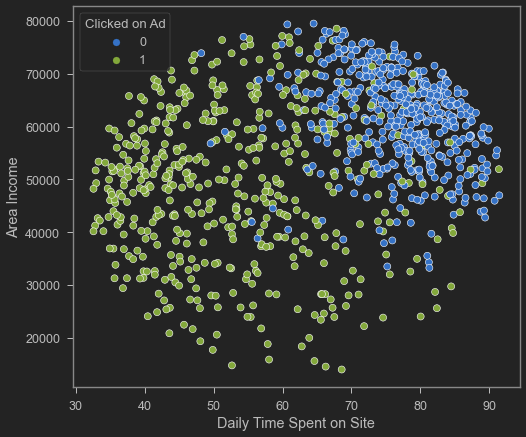

In [27]:
#Visualizing the relationship between income and daily time spent on site to clicked ad
sns.scatterplot(x = clicks_df['Daily Time Spent on Site'], y = clicks_df['Area Income'], hue = clicks_df['Clicked on Ad'])

<AxesSubplot:xlabel='Clicked on Ad', ylabel='Area Income'>

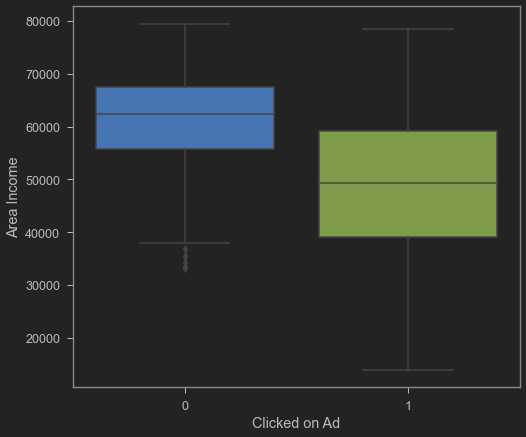

In [31]:
# Visualizng the relationship between only salary and cliced ad
sns.boxplot(x = clicks_df['Clicked on Ad'], y = clicks_df["Area Income"])

<AxesSubplot:xlabel='Age', ylabel='count'>

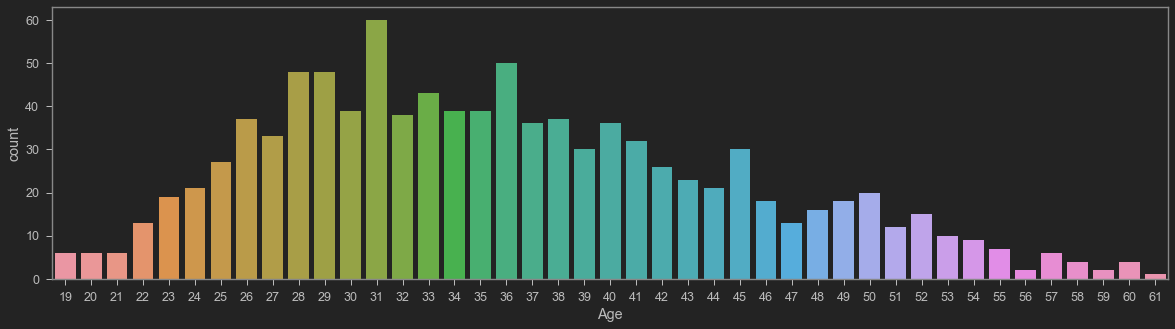

In [35]:
#Visualizng the age of the customer
fig = plt.figure(figsize = (20,5))
sns.countplot(x = clicks_df['Age'], data = clicks_df)


<AxesSubplot:xlabel='Age', ylabel='Daily Internet Usage'>

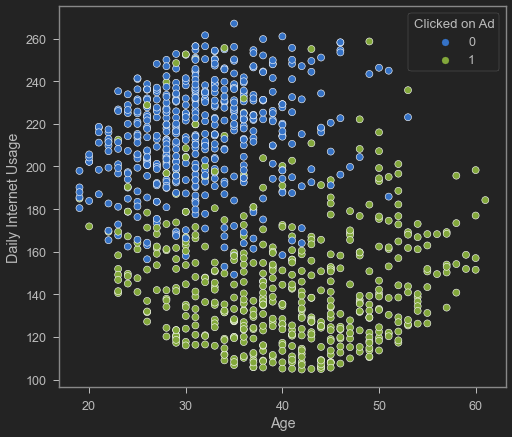

In [39]:
#Visualizing the relationship between age and daily internet usage to clicked ad
sns.scatterplot(x = clicks_df['Age'], y = clicks_df['Daily Internet Usage'], hue = clicks_df['Clicked on Ad'])

<AxesSubplot:>

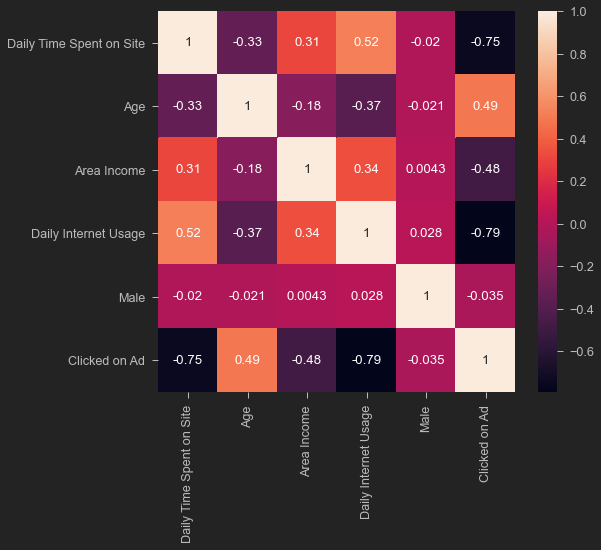

In [40]:
#Plotting correlation matrix
sns.heatmap(clicks_df.corr(),annot = True)

# Preparing dataset for training model

In [45]:
clicks_df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0.0,Tunisia,3/27/2016 0:53,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1.0,Nauru,4/4/2016 1:39,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0.0,San Marino,3/13/2016 20:35,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1.0,Italy,1/10/2016 2:31,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0.0,Iceland,6/3/2016 3:36,0
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1.0,Lebanon,2/11/2016 21:49,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1.0,Bosnia and Herzegovina,4/22/2016 2:07,1
997,NaN,51,42415.72,120.37,Expanded intangible solution,South Jessica,1.0,Mongolia,2/1/2016 17:24,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0.0,Guatemala,3/24/2016 2:35,0


In [86]:
# Removing Ad Topic Line, City, Country and Timestamp columns
clicks_df.drop(labels = ['Ad Topic Line','City', 'Country', 'Timestamp'], axis =1, inplace = True)

In [55]:
clicks_df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
0,68.95,35,61833.90,256.09,0.0,0
1,80.23,31,68441.85,193.77,1.0,0
2,69.47,26,59785.94,236.50,0.0,0
3,74.15,29,54806.18,245.89,1.0,0
4,68.37,35,73889.99,225.58,0.0,0
...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,1.0,1
996,51.30,45,67782.17,134.42,1.0,1
997,NaN,51,42415.72,120.37,1.0,1
998,55.55,19,41920.79,187.95,0.0,0


In [57]:
#Checking for missing values
clicks_df.isnull().sum()

Daily Time Spent on Site    13
Age                          0
Area Income                 13
Daily Internet Usage        11
Male                         3
Clicked on Ad                0
dtype: int64

In [84]:
# Filling missing values with the average
clicks_df['Area Income'].fillna(value = clicks_df['Area Income'].mean(),inplace = True)
clicks_df['Daily Time Spent on Site'].fillna(value = clicks_df['Daily Time Spent on Site'].mean(),inplace = True)
clicks_df['Daily Internet Usage'].fillna(value = clicks_df['Daily Internet Usage'].mean(),inplace = True)


In [87]:
# Removing missing values from Male column
clicks_df.dropna(inplace = True)

In [88]:
clicks_df.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Male                        0
Clicked on Ad               0
dtype: int64

In [92]:
# Assigning data to X and Y
X = clicks_df.drop('Clicked on Ad', axis =1).values
Y = clicks_df["Clicked on Ad"].values

In [96]:
# Feature Scalling
sc = StandardScaler()
X = sc.fit_transform(X)

In [97]:
X,Y

(array([[ 2.57270849e-01, -1.18418047e-01,  5.12064430e-01,
          1.74559138e+00, -9.61618648e-01],
        [ 9.74308600e-01, -5.74258944e-01,  1.00656339e+00,
          3.17984978e-01,  1.03991328e+00],
        [ 2.90325781e-01, -1.14406007e+00,  3.58807507e-01,
          1.29683000e+00, -9.61618648e-01],
        ...,
        [ 1.70052900e-03,  1.70494554e+00, -9.41074562e-01,
         -1.36343848e+00,  1.03991328e+00],
        [-5.94529317e-01, -1.94178164e+00, -9.78112126e-01,
          1.84662300e-01, -9.61618648e-01],
        [-1.26452736e+00, -1.14406007e+00, -1.87948623e+00,
         -3.52513946e-02, -9.61618648e-01]]),
 array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
        1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
        0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
        1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
        1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 